In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import math
import matplotlib.pyplot as plt
import time
from scipy import linalg as LA
from scipy import special as special
import copy
from scipy import optimize as opt
import RGMPS as RGMPS

In [2]:
from scipy.sparse import diags
from scipy import linalg as LA
#Exact energy for the transverse field Ising model
def EExactTFIM(h, J, L):
    CC=diags(h*np.ones(L)).toarray()+diags(J*np.ones(L-1),-1)
    H2=CC.dot(CC.T)
    return -np.sum(LA.eigh(H2,eigvals_only=True)**.5)

In [6]:
#10 runs of 100 sweeps with random initial conditions (typically I will actually use 1000 sweeps)
E_h1p5=[]
for i in range(10):
    LL=4
    params={"h":1.5,"J":1.0,"sweeps":10,"D":4,"L":LL,"PBC":False}
    renorm=RGMPS.RGMPS(params,modelname="TFieldIsing")
    tic=time.time()
    blah=renorm.optimizeUGrad(1,100,0.00,0.0,True,True)
    E_h1p5.append(blah)
    toc=time.time()
    print(toc-tic)

5.70160293579
5.68157696724
5.60843396187
5.81707906723
5.90062904358
5.75331807137
5.66640400887
5.64494419098
5.69313907623
5.49031710625


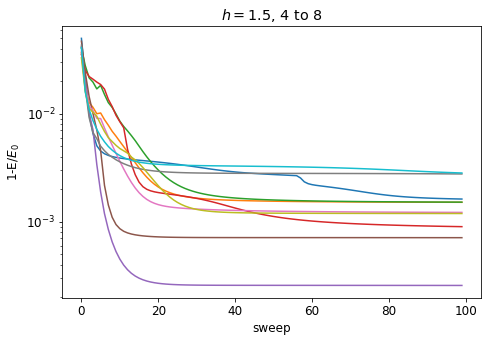

In [7]:
font = {'size'   : 12}
matplotlib.rc('font', **font)
fig=plt.figure(figsize=(7.5,5))
plt.xlabel("sweep")
plt.ylabel(r'1-E/$E_0$')
plt.title(r"$h=1.5$, 4 to 8")

plt.yscale('log')
EExact1p5=EExactTFIM(1.5, 1.0, 8)
#relative error vs sweep
for i in range(10):
    plt.plot(1-E_h1p5[i]/EExact1p5)

In [8]:
hs=np.logspace(0,1,num=20)
EE_4to8=np.array([EExactTFIM(h, 1.0, 8) for h in hs])#exact
E_4to8=[]
for h in hs:
    LL=4
    params={"h":h,"J":1.0,"sweeps":10,"D":4,"L":LL,"PBC":False}
    renorm=RGMPS.RGMPS(params,modelname="TFieldIsing")
    tic=time.time()
    blah=renorm.optimizeUGrad(1,100,0.0,0.0,True,True)
    E_4to8.append(blah)
    toc=time.time()
    print(toc-tic)

5.99062609673
5.80156493187
5.82863712311
5.74535608292
6.00426697731
5.90813994408
6.02423501015
5.95648312569
6.08834409714
5.41774988174
6.30781984329
6.8016769886
5.94563817978
5.6524939537
5.75826501846
6.12235093117
6.06308698654
5.75083398819
5.97379612923
5.96743702888


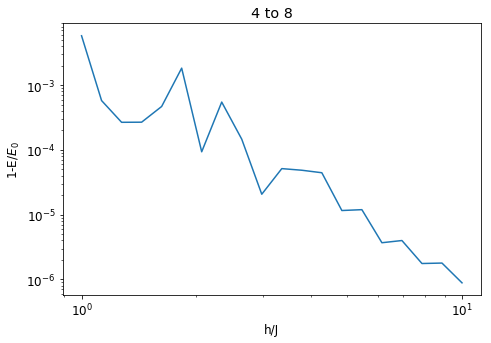

In [9]:
font = {'size'   : 12}
matplotlib.rc('font', **font)
fig=plt.figure(figsize=(7.5,5))
plt.xlabel(r"h/J")
plt.ylabel(r'1-E/$E_0$')
plt.title("4 to 8")

plt.xscale('log')
plt.yscale('log')
#relative error vs sweep

#change 99 to 999 if you do 1000 sweeps, etc; clearly to get a good curve you would
#want to do more than 100 and also take the best of many initial conditions
plt.plot(hs,1-np.transpose(E_4to8)[99]/EE_4to8)